<h1 style="text-align:center;">Insurance Premium Prediction</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head(40)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df['age'].max()

64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [8]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [9]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [10]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [11]:
df['charges'].mean()

13270.422265141257

In [12]:
male=df[df['sex']=='male']
female=df[df['sex']=='female']

male_avg=male['charges'].mean()
female_avg=female['charges'].mean()

In [13]:
male_avg

13956.751177721893

In [14]:
female_avg

12569.578843835347

In [15]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
df2=female[female['charges']<=female['charges'].mean()]
df2.head()

,age,sex,bmi,children,smoker,region,charges
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
7,37,female,27.74,3,no,northwest,7281.5056
13,56,female,39.82,0,no,southeast,11090.7178
16,52,female,30.78,1,no,northeast,10797.3362


In [17]:
df2

,age,sex,bmi,children,smoker,region,charges
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
13,56,female,39.82,0,no,southeast,11090.71780
16,52,female,30.78,1,no,northeast,10797.33620
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350


In [18]:
df2['smoker'].value_counts()

smoker
no    441
Name: count, dtype: int64

In [19]:
df2['children'].value_counts()

children
0    187
1    115
2     78
3     48
4      7
5      6
Name: count, dtype: int64

In [20]:
df2['region'].value_counts()

region
southwest    120
northwest    113
southeast    112
northeast     96
Name: count, dtype: int64

In [21]:
df['bmi']

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

In [22]:
underweight=df[df['bmi']<=18.5].value_counts()
healthy_weight=df[df['bmi']>=18.5].value_counts()
overweight=df[df['bmi']>24].value_counts()

In [23]:
label=[]
for w in df['bmi']:
    if w<18.5:
        label.append('underweight')
    elif w >18.5 and w<24.9:
        label.append('healthy_weight')
    elif w>25.0 and w <29.9:
        label.append('overweight')
    else:
        label.append('Obese')


In [24]:
len(label)

1338

In [25]:
df['health']=label

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges,health
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,healthy_weight
4,32,male,28.880,0,no,northwest,3866.85520,overweight


In [27]:
label

['overweight',
 'Obese',
 'Obese',
 'healthy_weight',
 'overweight',
 'overweight',
 'Obese',
 'overweight',
 'overweight',
 'overweight',
 'overweight',
 'overweight',
 'Obese',
 'Obese',
 'Obese',
 'healthy_weight',
 'Obese',
 'healthy_weight',
 'Obese',
 'Obese',
 'Obese',
 'Obese',
 'Obese',
 'Obese',
 'overweight',
 'overweight',
 'healthy_weight',
 'Obese',
 'underweight',
 'Obese',
 'Obese',
 'overweight',
 'overweight',
 'overweight',
 'Obese',
 'healthy_weight',
 'Obese',
 'healthy_weight',
 'Obese',
 'Obese',
 'overweight',
 'Obese',
 'healthy_weight',
 'Obese',
 'Obese',
 'Obese',
 'Obese',
 'Obese',
 'healthy_weight',
 'Obese',
 'Obese',
 'Obese',
 'overweight',
 'Obese',
 'overweight',
 'Obese',
 'Obese',
 'Obese',
 'healthy_weight',
 'Obese',
 'overweight',
 'Obese',
 'healthy_weight',
 'overweight',
 'healthy_weight',
 'overweight',
 'Obese',
 'overweight',
 'Obese',
 'healthy_weight',
 'healthy_weight',
 'overweight',
 'overweight',
 'Obese',
 'overweight',
 'Obese',
 '

In [28]:
df['health'].value_counts()

health
Obese             725
overweight        372
healthy_weight    221
underweight        20
Name: count, dtype: int64

In [29]:
#average charges of each and every health class

# min,max,mean,charges using groupby

In [30]:
df

,age,sex,bmi,children,smoker,region,charges,health
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,healthy_weight
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese
1334,18,female,31.920,0,no,northeast,2205.98080,Obese
1335,18,female,36.850,0,no,southeast,1629.83350,Obese
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


In [31]:
health_group=df.groupby('health')

In [32]:
health_group[['charges']].min()

,charges
health,
Obese,1131.5066
healthy_weight,1121.8739
overweight,1252.4070
underweight,1621.3402


In [33]:
health_group[['charges']].max()

,charges
health,
Obese,63770.42801
healthy_weight,35069.37452
overweight,38245.59327
underweight,32734.18630


In [34]:
health_group[['charges']].mean()

,charges
health,
Obese,15420.399577
healthy_weight,10404.900084
overweight,11020.183782
underweight,8852.200585


In [35]:
health_analysis=health_group['charges'].agg(min_charges='min',max_charges='max',average_charges='mean')

In [36]:
health_analysis

,min_charges,max_charges,average_charges
health,,,
Obese,1131.5066,63770.42801,15420.399577
healthy_weight,1121.8739,35069.37452,10404.900084
overweight,1252.4070,38245.59327,11020.183782
underweight,1621.3402,32734.18630,8852.200585


In [37]:
health_analysis.sort_values('average_charges')

,min_charges,max_charges,average_charges
health,,,
underweight,1621.3402,32734.18630,8852.200585
healthy_weight,1121.8739,35069.37452,10404.900084
overweight,1252.4070,38245.59327,11020.183782
Obese,1131.5066,63770.42801,15420.399577


In [38]:
health_classes=list(health_analysis.index)

In [39]:
average_charges=(health_analysis['min_charges'].values)

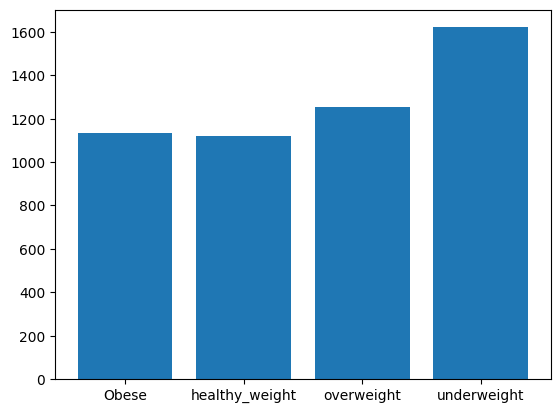

In [40]:
plt.bar(health_classes,average_charges)

plt.show()

In [41]:
df

,age,sex,bmi,children,smoker,region,charges,health
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,healthy_weight
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese
1334,18,female,31.920,0,no,northeast,2205.98080,Obese
1335,18,female,36.850,0,no,southeast,1629.83350,Obese
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


In [42]:
select_region=df.groupby('region')

In [43]:
select_region[['region']].min()

,region
region,
northeast,northeast
northwest,northwest
southeast,southeast
southwest,southwest


In [44]:
select_region[['region']].max()

,region
region,
northeast,northeast
northwest,northwest
southeast,southeast
southwest,southwest


In [45]:

region_analysis=select_region['region'].agg(min_region='min',max_region='max')

In [46]:
region_analysis

,min_region,max_region
region,,
northeast,northeast,northeast
northwest,northwest,northwest
southeast,southeast,southeast
southwest,southwest,southwest


In [47]:
region_analysis.sort_values('min_region')

,min_region,max_region
region,,
northeast,northeast,northeast
northwest,northwest,northwest
southeast,southeast,southeast
southwest,southwest,southwest


In [48]:
# gender==> onehot encode
gender_dict={ 'female':0,'male':1}
smoker_dict={'yes':1,'no':0}

df['sex']=df['sex'].map(gender_dict)
df['smoker']=df['smoker'].map(smoker_dict)

In [49]:
df.health

0           overweight
1                Obese
2                Obese
3       healthy_weight
4           overweight
             ...      
1333             Obese
1334             Obese
1335             Obese
1336        overweight
1337        overweight
Name: health, Length: 1338, dtype: object

In [50]:
yy=list(df.health.value_counts().keys())

In [51]:
health_x=df.health.value_counts()
health_x

health
Obese             725
overweight        372
healthy_weight    221
underweight        20
Name: count, dtype: int64

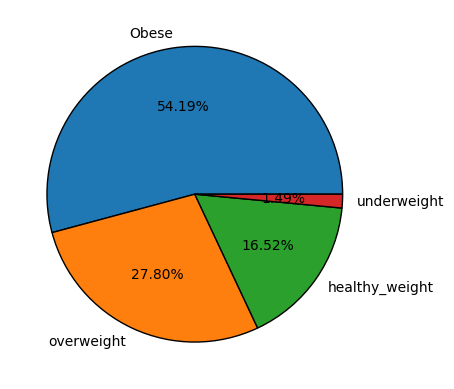

In [52]:
plt.pie(health_x,labels=yy,autopct='%1.2f%%',wedgeprops={'ec':'k'})
plt.show()

In [53]:
df['health'].value_counts()

health
Obese             725
overweight        372
healthy_weight    221
underweight        20
Name: count, dtype: int64

In [54]:
health_category_dict={'underweight':1,'healthy_weight':2,'overweight':3,'Obese':4}
df['health']=df['health'].map(health_category_dict)

In [55]:
df.head()

,age,sex,bmi,children,smoker,region,charges,health
0,19,0,27.900,0,1,southwest,16884.92400,3
1,18,1,33.770,1,0,southeast,1725.55230,4
2,28,1,33.000,3,0,southeast,4449.46200,4
3,33,1,22.705,0,0,northwest,21984.47061,2
4,32,1,28.880,0,0,northwest,3866.85520,3


In [56]:
# alphabets to (0,1)--> onehot encoding
# change into (1,2,3,4,5) specifically --> Label encoding

final_data=pd.get_dummies(df).astype(int)
final_data.head()

,age,sex,bmi,children,smoker,charges,health,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,3,0,0,0,1
1,18,1,33,1,0,1725,4,0,0,1,0
2,28,1,33,3,0,4449,4,0,0,1,0
3,33,1,22,0,0,21984,2,0,1,0,0
4,32,1,28,0,0,3866,3,0,1,0,0


In [57]:
## split our data in x and y 
x=final_data.drop('charges',axis='columns')
y=final_data['charges']

In [58]:
## Training and testing split test size=0.2
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [59]:
## Model training
# Regression
# 1.Linear regression
# 2.Decsion tree
# random forest

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

In [60]:
## object creation 
## hyper parameter tuning--> to obtained highest accuracy
lin=LinearRegression()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
# goig with default paramters
## model train



In [61]:
x_train.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
health              0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [62]:
x_train

,age,sex,bmi,children,smoker,health,region_northeast,region_northwest,region_southeast,region_southwest
1131,27,1,45,2,0,4,0,0,0,1
918,61,0,28,0,0,3,0,0,0,1
485,31,0,31,0,0,4,1,0,0,0
49,36,1,35,1,1,4,0,0,1,0
871,26,0,29,1,0,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
43,37,0,30,2,0,4,0,0,1,0
1108,26,1,30,1,0,4,0,0,0,1
634,51,1,39,1,0,4,0,0,0,1
645,48,1,30,3,0,4,1,0,0,0


In [63]:
y_train

1131     3693
918     13041
485      4347
49      38709
871      3392
        ...  
43       6313
1108     2904
634      9391
645     10141
477      2534
Name: charges, Length: 1070, dtype: int32

In [64]:
lin.fit(x_train,y_train)
dtr.fit(x_train,y_train)
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [65]:
print("Training score by linear:",lin.score(x_train,y_train)*100)
print("Training Score by decision tree:",dtr.score(x_train,y_train)*100)
print("Training score by random forest: ",rfr.score(x_train,y_train)*100)

Training score by linear: 76.42857774576244
Training Score by decision tree: 99.68621803476552
Training score by random forest:  97.7481114893075


In [66]:
print("Testing score by linear:",lin.score(x_test,y_test)*100)
print("Testing Score by decision tree:",dtr.score(x_test,y_test)*100)
print("Testing score by random forest: ",rfr.score(x_test,y_test)*100)

Testing score by linear: 70.54373210533615
Testing Score by decision tree: 68.1603652586253
Testing score by random forest:  80.16078657398694


In [67]:
# prediction
prediction_linear=lin.predict(x_test)
prediction_decision=dtr.predict(x_test)
prediction_randomforest=rfr.predict(x_test)

In [68]:
y_test

977      2902
1175     2154
345      6184
202     13012
1170    17178
        ...  
168      2719
428      3167
169      4827
160     21348
1        1725
Name: charges, Length: 268, dtype: int32

In [69]:
comparision=pd.concat([x_test,y_test],axis=1)
comparision.head()

,age,sex,bmi,children,smoker,health,region_northeast,region_northwest,region_southeast,region_southwest,charges
977,26,1,29,1,0,3,0,0,1,0,2902
1175,22,0,27,0,0,3,0,0,0,1,2154
345,34,0,29,3,0,3,0,0,1,0,6184
202,60,0,24,0,0,2,0,1,0,0,13012
1170,18,1,27,1,1,3,1,0,0,0,17178


In [70]:
comparision['Linear_Prediction']=prediction_linear
comparision['Decision_Tree_Prediction']=prediction_decision
comparision['Random_Forest_Prediction']=prediction_randomforest

In [71]:
comparision.head()

,age,sex,bmi,children,smoker,health,region_northeast,region_northwest,region_southeast,region_southwest,charges,Linear_Prediction,Decision_Tree_Prediction,Random_Forest_Prediction
977,26,1,29,1,0,3,0,0,1,0,2902,3343.492224,2904.0,3473.29
1175,22,0,27,0,0,3,0,0,0,1,2154,1946.643098,2156.0,2145.68
345,34,0,29,3,0,3,0,0,1,0,6184,6726.950520,11737.0,7249.11
202,60,0,24,0,0,2,0,1,0,0,13012,10758.099603,13415.0,17166.94
1170,18,1,27,1,1,3,1,0,0,0,17178,26057.625357,16450.0,18219.72


In [72]:
comparision.to_csv('prediction.csv',index=False)

In [73]:
final_data

,age,sex,bmi,children,smoker,charges,health,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,3,0,0,0,1
1,18,1,33,1,0,1725,4,0,0,1,0
2,28,1,33,3,0,4449,4,0,0,1,0
3,33,1,22,0,0,21984,2,0,1,0,0
4,32,1,28,0,0,3866,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,4,0,1,0,0
1334,18,0,31,0,0,2205,4,1,0,0,0
1335,18,0,36,0,0,1629,4,0,0,1,0
1336,21,0,25,0,0,2007,3,0,0,0,1


In [74]:
import joblib , os

In [75]:
## Saving the models
os.makedirs('models',exist_ok=True)
joblib.dump(lin,'./models/linear_model.lb')
joblib.dump(dtr,'./models/decisiontree.lb')
joblib.dump(rfr,'./models/randomforest.lb')

['./models/randomforest.lb']

In [76]:
os.listdir()

['.git',
 'app.py',
 'database.py',
 'database2.py',
 'insurance',
 'insurance.csv',
 'insurance.db',
 'insuranceprj.ipynb',
 'models',
 'prediction.csv',
 'static',
 'templates']

<h1 style='text-align:center'>Thank you</h1>

In [77]:
jgmnhg hfg

SyntaxError: invalid syntax (902196014.py, line 1)

In [ ]:
# remove bmi column and region column labelencode and try yourself

In [ ]:
## to improve the performance of model or algo
# 1. cchange your data pre processing
# 2. get sufficient amount data
# 3. linear,dt,randomforest-> change your algorithm.
# 4. default parameter-> hyper parameter tuning

In [ ]:
new_final_data=final_data.drop(['bmi'],axis=1)
new_final_data

,age,sex,children,smoker,charges,health,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,0,1,16884,3,0,0,0,1
1,18,1,1,0,1725,4,0,0,1,0
2,28,1,3,0,4449,4,0,0,1,0
3,33,1,0,0,21984,2,0,1,0,0
4,32,1,0,0,3866,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,3,0,10600,4,0,1,0,0
1334,18,0,0,0,2205,4,1,0,0,0
1335,18,0,0,0,1629,4,0,0,1,0
1336,21,0,0,0,2007,3,0,0,0,1


In [ ]:
x=new_final_data.drop('charges' ,axis=1)

In [ ]:
y=new_final_data[['charges']]
y

,charges
0,16884
1,1725
2,4449
3,21984
4,3866
...,...
1333,10600
1334,2205
1335,1629
1336,2007


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [ ]:
lin.fit(x_train,y_train)
dtr.fit(x_train,y_train)
rfr.fit(x_train,y_train)

c:\Users\RONAK BEDI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
print("Training score by linear :",lin.score(x_train,y_train)*100)
print("Training score by decision :",dtr.score(x_train,y_train)*100)
print("Training score by random :",rfr.score(x_train,y_train)*100)
print('')

print("Testing score by linear:",lin.score(x_test,y_test)*100)
print("Testing score by dicision :",dtr.score(x_test,y_test)*100)
print("Testing score by random :",rfr.score(x_test,y_test)*100)

Training score by linear : 74.67454923061354
Training score by decision : 98.09531363474832
Training score by random : 96.09521196732875

Testing score by linear: 76.37006966831345
Testing score by dicision : 76.9828957006628
Testing score by random : 85.10083400057151


In [ ]:
new_linear_prediction=lin.predict(x_test)
new_decision_prediction=dtr.predict(x_test)
new_random_prediction=rfr.predict(x_test)

In [ ]:
x_test

,age,sex,children,smoker,health,region_northeast,region_northwest,region_southeast,region_southwest
930,26,1,1,0,4,0,0,1,0
899,19,0,0,0,2,0,1,0,0
107,26,1,2,0,4,0,1,0,0
432,42,1,0,0,3,0,0,0,1
662,32,0,1,0,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...
141,26,1,1,0,4,1,0,0,0
1048,25,0,1,0,2,0,1,0,0
1324,31,1,1,0,3,0,1,0,0
554,25,0,0,0,4,1,0,0,0


In [ ]:
y_test

,charges
930,2927
899,2117
107,3877
432,5969
662,5148
...,...
141,3490
1048,3594
1324,4239
554,17878


In [ ]:
new_comparison=pd.concat([x_test,y_test],axis=1)
new_comparison.head()

,age,sex,children,smoker,health,region_northeast,region_northwest,region_southeast,region_southwest,charges
930,26,1,1,0,4,0,0,1,0,2927
899,19,0,0,0,2,0,1,0,0,2117
107,26,1,2,0,4,0,1,0,0,3877
432,42,1,0,0,3,0,0,0,1,5969
662,32,0,1,0,4,1,0,0,0,5148


In [ ]:
new_comparison['Linear_Prediction']=new_linear_prediction
new_comparison['Decision_Prediction']=new_decision_prediction
new_comparison['Random_Prediction']=new_random_prediction

In [ ]:
new_comparison.head()

,age,sex,children,smoker,health,region_northeast,region_northwest,region_southeast,region_southwest,charges,Linear_Prediction,Decision_Prediction,Random_Prediction
930,26,1,1,0,4,0,0,1,0,2927,6219.958855,2902.0,3031.266667
899,19,0,0,0,2,0,1,0,0,2117,-669.286798,1732.0,2102.180538
107,26,1,2,0,4,0,1,0,0,3877,6938.049988,4189.0,7671.630833
432,42,1,0,0,3,0,0,0,1,5969,7269.174718,5979.0,6090.752500
662,32,0,1,0,4,1,0,0,0,5148,8658.873427,5594.0,5869.965833
